## Rastringin 2D Algoritmo Evolutivo

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\pygad\pygad.py:522: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\pygad\pygad.py:940: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in popul

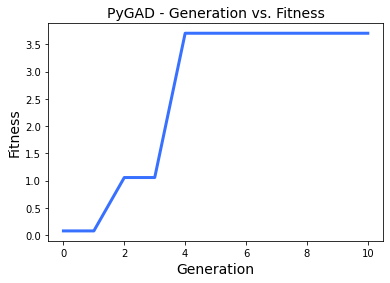

[[3.0345217727011304,
  2.8391889871474945,
  3.3388143045497554,
  4.051533179224892,
  4.329059545587523,
  -1.8793646322225903],
 [0.6817775781930013,
  0.6047827894997893,
  3.75251730485257,
  3.6569616344937366,
  -0.3335173845878643,
  4.90872445815628],
 [4.413765738451041,
  2.5199810282424284,
  2.594782732645111,
  -1.223093210038573,
  -0.747976170890934,
  2.6155150324765195],
 [2.9324294271796383,
  3.610551978528651,
  1.6338653159503567,
  3.5166851450828265,
  0.008629499063261825,
  -0.6196529023400075],
 [-0.8959842549062793,
  -0.5393552138622777,
  -0.7272153611915546,
  -0.931694552599271,
  -1.6613164490746322,
  1.194760907081056],
 [1.8988388171317645,
  0.15545583960766907,
  3.610582478320615,
  1.2880846550640035,
  1.52169828550631,
  2.514058675485421],
 [4.413198140239299,
  0.21016203510762743,
  1.3149215930808964,
  2.126432283199062,
  4.190161168397212,
  -0.38946520210515456],
 [-0.1161801672679883,
  3.836849511704682,
  3.1918695287761167,
  4.941

In [2]:
import numpy as np
import pygad
import matplotlib.pyplot as plt

function_inputs = [4,-2,3.5,5,-11,-4.7]
desired_output = 44

def fitness_func(solution, solution_idx):
    output = np.sum(solution*function_inputs)
    fitness = 1.0 / np.abs(output - desired_output)
    return fitness

def fitness_func2(solution, solution_idx):
    output = np.sum(solution*function_inputs)
    fitness = -np.abs(output - desired_output)
    return fitness

fitness_function = fitness_func

num_generations = 10
num_parents_mating = 4

sol_per_pop = 8
num_genes = len(function_inputs)

init_range_low = -2
init_range_high = 5

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       save_solutions=True)

ga_instance.run()
ga_instance.plot_fitness()
ga_instance.best_solution()
soluciones = ga_instance.solutions

soluciones

## Rastrigin 3D Algoritmo evolutivo

In [3]:
##Rastrigin 3D - Algoritmo evolutivo

import random
import numpy as np

def rastrigin(x, y, z):
    A = 10
    return A * 3 + (x**2 - A * np.cos(2*np.pi*x)) + (y**2 - A * np.cos(2*np.pi*y)) + (z**2 - A * np.cos(2*np.pi*z))

def create_individual():
    x = random.uniform(-5.12, 5.12)
    y = random.uniform(-5.12, 5.12)
    z = random.uniform(-5.12, 5.12)
    return (x, y, z)

def evaluate_population(population):
    fitness = []
    for individual in population:
        x, y, z = individual
        fitness.append(rastrigin(x, y, z))
    return fitness

def select_parents(population, fitness):
    return random.choices(population, weights=fitness, k=2)

def create_child(parents):
    parent1, parent2 = parents
    x = (parent1[0] + parent2[0]) / 2
    y = (parent1[1] + parent2[1]) / 2
    z = (parent1[2] + parent2[2]) / 2
    mutation_rate = 0.1
    if random.random() < mutation_rate:
        x = random.uniform(-5.12, 5.12)
    if random.random() < mutation_rate:
        y = random.uniform(-5.12, 5.12)
    if random.random() < mutation_rate:
        z = random.uniform(-5.12, 5.12)
    return (x, y, z)

def create_next_generation(population, fitness):
    next_generation = []
    for i in range(len(population)):
        parents = select_parents(population, fitness)
        child = create_child(parents)
        next_generation.append(child)
    return next_generation

population_size = 100
generations = 100
population = [create_individual() for _ in range(population_size)]

for i in range(generations):
    fitness = evaluate_population(population)
    best_fitness = min(fitness)
    best_individual = population[fitness.index(best_fitness)]
    #print("Generation:", i+1, "Best fitness:", best_fitness)
    population = create_next_generation(population, fitness)

print("Best individual:", best_individual, "Best fitness:", best_fitness)

Best individual: (-0.02321715613642167, 0.028144228769590662, -0.05786110714774409) Best fitness: 0.9204425448471287
